# Saving the values of period ratios from 1.1-1.5 from the NASA Exoplanet Archive to a csv
We want to save planets that are in trios that have an inner compact period ratio (1.1-1.5 since those below 1.1 should be unstable) to match our simulations for multiplanet (>3) systems to a csv to use for our other notebooks! A trio is a group of three adjacent planets in a system. The period ratio between the outer period ratios can be anything as long as the inner is compact.

In [1]:
bin_number = 30

In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#MAKE INITIAL DATA FRAME

df = pd.read_csv('PSCompPars_2024.07.25_09.45.09.csv')

# Create an array of all host star/system names
hosts = df['hostname'].unique()

# For each planetary system...
for host in tqdm(hosts):
    # If the system contains less than 3 planets...
    if (df['hostname'] == host).sum() < 3:
        # Get the row indices of the system's planets
        index = df[df['hostname']==host].index
        # Remove those rows from our DataFrame
        df.drop(index, inplace=True)

# Data that might be useful to us
planet_data = pd.DataFrame()
planet_data["Planet Name"] = df['pl_name']
planet_data["Host Name"] = df['hostname']
planet_data["Orbital Period"] = df['pl_orbper']
planet_data["Discovery Method"] = df['discoverymethod']
planet_data["Semi-Major Axis (AU)"] = df['pl_orbsmax']
planet_data["Eccentricity"] = df['pl_orbeccen']
planet_data["Radius (R_earth)"] = df['pl_rade']
planet_data["Mass or Mass * sin(i) (M_earth)"] = df['pl_bmasse']
planet_data["Stellar Mass (M_sun)"] = df['st_mass']
planet_data.to_csv('2024_planet_data.csv')
df = pd.read_csv('2024_planet_data.csv', index_col=0)
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4290/4290 [00:06<00:00, 635.94it/s]


,Planet Name,Host Name,Orbital Period,Discovery Method,Semi-Major Axis (AU),Eccentricity,Radius (R_earth),Mass or Mass * sin(i) (M_earth),Stellar Mass (M_sun)
21,2MASS J19383260+4603591 b,2MASS J19383260+4603591,406.0000,Eclipse Timing Variations,0.9200,0.330,13.4,603.8770,0.48
27,47 UMa b,47 UMa,1078.0000,Radial Velocity,2.1000,0.032,13.2,804.0800,1.06
28,47 UMa c,47 UMa,2391.0000,Radial Velocity,3.6000,0.098,14.2,171.6210,1.06
29,47 UMa d,47 UMa,14002.0000,Radial Velocity,11.6000,0.160,13.5,521.2200,1.06
32,55 Cnc b,55 Cnc,14.6516,Radial Velocity,0.1134,0.000,13.9,263.9785,0.91


In [4]:
df = pd.read_csv('2024_planet_data.csv', index_col=0)
df = df.dropna(subset=["Orbital Period"])
df[df["Orbital Period"] == '0']['Orbital Period']

Series([], Name: Orbital Period, dtype: float64)

In [5]:
df.shape

(1135, 9)

In [6]:
df = pd.read_csv('2024_planet_data.csv', index_col=0)
df = df.dropna(subset=["Orbital Period"])
df = df[df["Orbital Period"] != '0']
print(df.shape)
#print(df["Orbital Period"].to_string())
#df = df["<" not in df["Orbital Period"]]
ratios = df["Orbital Period"].to_numpy()
#print(ratios.index)
badlist = []
#df = df["<" not in df["Orbital Period"]]
#print(df)
for i in range(1,len(ratios)):
    if "<" in ratios[i] or 'a' in ratios[i] or '&' in ratios[i]:
        badlist.append(ratios[i])
#print(badlist) 
#print(df.to_string())
#print(badlist)
df = df[~df["Orbital Period"].isin(badlist)]
print(df.shape)
#print(df)
#print(ratios)


(1135, 9)


TypeError: argument of type 'numpy.float64' is not iterable

In [10]:
# GET RID OF ONES THAT DON'T HAVE INNER PRATIO 1.1-1.5
df['Keep'] = False

# for every system in planet_data
for system in df['Host Name'].unique():
    # new system df of JUST planets from that system
    system_df = df[df['Host Name'] == system]
    # sort them in order of orbital period lowest to highest
    system_sorted = system_df.sort_values(by='Orbital Period')
    
    Nplanets = system_df.shape[0] # number of planets in system
    Ntrios = Nplanets - 2 # number of trios, three adjacent planet groupings
    
    # for every trio
    for q in range(Ntrios):
        P1 = system_sorted.iloc[q]['Orbital Period']
        P2 = system_sorted.iloc[q+1]['Orbital Period']
        P3 = system_sorted.iloc[q+2]['Orbital Period']
        
        # if the inner period ratio is 1.1-1.5
        if float(P2)/float(P1) > 1.1 and float(P2)/float(P1) < 1.5:
            # keep these planets in dataframe
            df.loc[system_sorted.iloc[q].name, 'Keep'] = True
            df.loc[system_sorted.iloc[q+1].name, 'Keep'] = True
            df.loc[system_sorted.iloc[q+2].name, 'Keep'] = True
            

In [11]:
# create new data frame with trios that have the inner pratio 1.1-1.5
compact_df = df[df['Keep'] == True]

# get rid of 'keep' column since these would all be true and it's not important anymore
del compact_df['Keep']

print(len(compact_df))

compact_df.to_csv('compact_planet_data_2024.csv')

df = pd.read_csv('compact_planet_data_2024.csv', index_col=0)
df.head()

164


,Planet Name,Host Name,Orbital Period,Discovery Method,Semi-Major Axis (AU),Eccentricity,Radius (R_earth),Mass or Mass * sin(i) (M_earth),Stellar Mass (M_sun)
130,DMPP-1 b,DMPP-1,18.570,Radial Velocity,0.1462,0.083,5.29,24.27,1.21
131,DMPP-1 c,DMPP-1,6.584,Radial Velocity,0.0733,0.057,3.06,9.60,1.21
133,DMPP-1 e,DMPP-1,5.516,Radial Velocity,0.0651,0.070,1.86,4.13,1.21
208,GJ 180 b,GJ 180,17.133,Radial Velocity,0.0920,0.070,2.43,6.49,0.43
209,GJ 180 c,GJ 180,24.329,Radial Velocity,0.1290,0.090,2.41,6.40,0.43


In [12]:
df = pd.read_csv('compact_planet_data_2024.csv', index_col=0)
len(df)

164

In [13]:
df = pd.read_csv('compact_planet_data_2024.csv')
# Create an array of all host star/system names
hosts = df['Host Name'].unique()
# For each planetary system...
for host in tqdm(hosts):
    # If the system contains less than 3 planets...
    if (df['Host Name'] == host).sum() < 3:
        # Get the row indices of the system's planets
        index = df[df['Host Name']==host].index
        # Remove those rows from our DataFrame
        df.drop(index, inplace=True)
many_p_hosts = df['Host Name'].unique()
#Calculates all_p_ratios
# planets dictionary – keys are planet names, values are Booleans
# Value = True if this planet is a member of a pair with P-ratio <= 1.5, False otherwise
planets = {}
# List of all period ratios less than or equal to 1.5
all_p_ratios = []
for host in many_p_hosts:
    # Create a Data Frame of only this system's planets
    system_df = df[df["Host Name"] == host]
    # system — a list of tuples of the form (period, planet_name)
    system = []
    # Populate system, add to planets
    for ind in system_df.index:
        system += [(system_df['Orbital Period'][ind], system_df['Planet Name'][ind])]
        # Planet values are False by default
        planets[system_df['Planet Name'][ind]] = False
    # Sort the system from smallest period to largest
    system.sort()
    # Pratios – a list of tuples of the form (p-ratio, inner_planet_name, outer_planet_name)
    Pratios = []
    # Populate Pratios
    for i in range(len(system) - 1):
        # Calculate each period ratio
        ratio = system[i + 1][0] / system[i][0]
        Pratios += [(ratio, system[i][1], system[i + 1][1])]
    # If a planet is a member of a pair with a P-ratio <= 1.5, we want to save it
    for ratio in Pratios:
        if ratio[0] <= 1.5:
            planets[ratio[1]] = True
            planets[ratio[2]] = True
            # Save this period ratio
            all_p_ratios += [ratio[0]]
# Remove all planets that are not part of a pair with P-ratio <= 1.5
for planet in planets.keys():
    if planets[planet] == False:
        planet_index = df[df['Planet Name'] == planet].index
        df.drop(planet_index, inplace = True)
#Now we have all_p_ratios
bins=np.linspace(1.1, 1.51, bin_number) 
#mask = pairs['Pratio'] < 1.5
#count, nik_edges = np.histogram(all_p_ratios)
#values = count
pratios_observed = np.asarray(all_p_ratios)
pratios_observed.sort()
observed_period_cdf = np.cumsum(pratios_observed)/pratios_observed.sum()
#pdf = count/sum(count)
#observed_norm_cumulative = np.cumsum(pdf)
#observed_period_pdf = count
nik_observed_period_cdf = observed_period_cdf
print(ratios)
print(len(observed_period_cdf))
np.save("observed_periods_2024",all_p_ratios)
np.save("observed_period_cdf",observed_period_cdf)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3336.23it/s]

[ 406.       1078.       2391.       ...    4.617033  241.258
 1276.46    ]
73


In [17]:
print(observed_norm_cumulative)
print([1] + list(sorted(pratios_observed)))

NameError: name 'observed_norm_cumulative' is not defined

NameError: name 'Decimal' is not defined

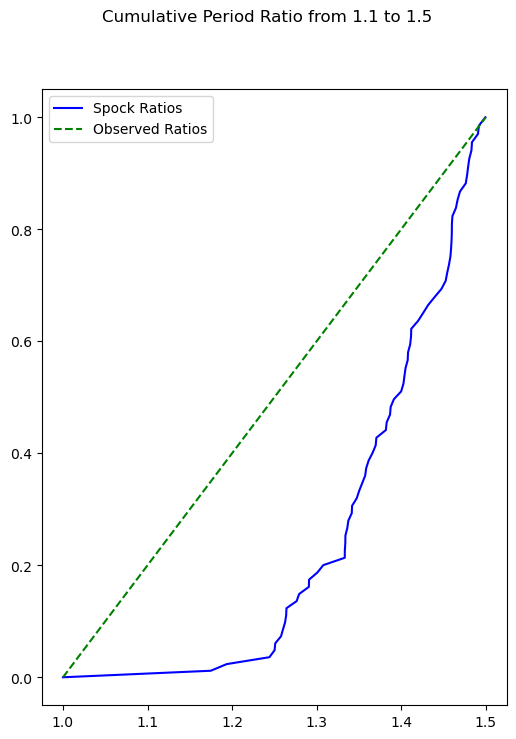

In [16]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(6)

#plt.plot(p_vals, period_ratios, c = 'green')
plt.plot([1] + list(sorted(pratios_observed)), [0]+list(nik_observed_period_cdf), c = 'blue')
#plt.plot(nik_edges[1:], np.load('observed_period_cdf.npy'), c = 'blue')
plt.plot([1, 1.5], [0, 1], ls="--", c = 'green')

plt.legend(["Spock Ratios", "Observed Ratios"])
plt.suptitle("Cumulative Period Ratio from 1.1 to 1.5")
plt.title("p = " + '%.2E' % Decimal( str(prob_list[-1])  ) + "   Number of iterations: " + str(len(spock_p_list)))
plt.xlabel("Period Ratio")
plt.ylabel("Cumulative Fraction")
plt.xlim(1.0,1.5)
fig.set_figheight(8)
fig.set_figwidth(6)
plt.figure(figsize=(10, 1))
plt.show()
